In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import os

In [ ]:
## Create datasets

In [36]:
records = []

for class_name in classes:
    path = os.path.join(ROOT_FOLDER, class_name, 'day', 'segmented')
    for file in os.listdir(path):
        if file == '.ipynb_checkpoints':
            continue
        image_path = os.path.join(path, file)
        frame_number = file.split('_')[-1].replace('.png', '')
        video_name = '_'.join(file.split('_')[:-1])
        
        record = {
            'image_path': image_path,
            'label': class_name,
            'daytime': 'day',
            'video_name': video_name,
            'frame_number': frame_number
        }
        records.append(record)
    
    path = os.path.join(ROOT_FOLDER, class_name, 'night', 'segmented')
    for file in os.listdir(path):
        if file == '.ipynb_checkpoints':
            continue
        image_path = os.path.join(path, file)
        frame_number = file.split('_')[-1].replace('.png', '')
        video_name = '_'.join(file.split('_')[:-1])
        
        record = {
            'image_path': image_path, 
            'label': class_name,
            'daytime': 'night',
            'video_name': video_name,
            'frame_number': frame_number
        }
        records.append(record)
        
df = pd.DataFrame(records)
df.to_csv('/home/jupyter/datasphere/project/dino_cosface/data.csv', index=False)

In [2]:
%pwd

'/home/jupyter/work/resources/dino_cosface'

In [91]:
df = pd.read_csv('data_day.csv')

In [93]:
df_exp1 = df[df['label'].isin(['1__ID-SLM-1ALB', '6__Аксайский'])].reset_index(drop=True)

In [97]:
def shuffle_and_limit(group):
    return group.sample(frac=1).head(50)

In [98]:
df_exp1_class1 = df[df['label'].isin(['1__ID-SLM-1ALB'])].groupby('video_name').apply(shuffle_and_limit).reset_index(drop=True)
df_exp1_class6 = df[df['label'].isin(['6__Аксайский'])].reset_index(drop=True)

In [101]:
df_exp1_class1_train = df_exp1_class1[df_exp1_class1['video_name'].isin(['IMG_0001', 'IMG_0002', 'IMG_0003', 'IMG_0276',
                                                                         'IMG_0039', 'IMG_0301', 'IMG_0406', 'IMG_0438', 'IMG_0514'])]

df_exp1_class6_train = df_exp1_class6[df_exp1_class6['video_name'].isin(['IMG_0011', 'IMG_0012', 'IMG_0017', 'IMG_0018'])]

df_exp1_class1_val = df_exp1_class1[df_exp1_class1['video_name'].isin(['IMG_0004', 'IMG_0439','IMG_0445', 'IMG_0456'])]

df_exp1_class6_val = df_exp1_class6[df_exp1_class6['video_name'].isin(['IMG_0013', 'IMAG0038'])]

df_exp1_train = pd.concat([df_exp1_class1_train, df_exp1_class6_train], axis=0).reset_index(drop=True)
df_exp1_val = pd.concat([df_exp1_class1_val, df_exp1_class6_val], axis=0).reset_index(drop=True)

df_exp1_train.to_csv('data_day_exp1_train.csv', index=False)
df_exp1_val.to_csv('data_day_exp1_val.csv', index=False)

In [114]:
len(pd.read_csv('data_day_exp1_train.csv').to_dict('records'))

752

In [ ]:
## Create dataset for experiment 2

In [34]:
df = pd.read_csv('data_day.csv')

In [36]:
df['label'].value_counts()

1__ID-SLM-1ALB    1785
6__Аксайский       453
2__ID-SLM-2BA      243
3__ID-SLM-8KAS     123
Name: label, dtype: int64

In [47]:
df_exp2 = df[df['label'].isin(['2__ID-SLM-2BA', '3__ID-SLM-8KAS'])].reset_index(drop=True)

In [54]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the dataframe
for train_index, val_index in split.split(df_exp2, df_exp2['label']):
    train_df = df_exp2.iloc[train_index]
    val_df = df_exp2.iloc[val_index]

In [52]:
train_df['label'].value_counts()

2__ID-SLM-2BA     194
3__ID-SLM-8KAS     98
Name: label, dtype: int64

In [53]:
val_df['label'].value_counts()

2__ID-SLM-2BA     49
3__ID-SLM-8KAS    25
Name: label, dtype: int64

In [57]:
df_exp1_train = pd.read_csv('data_day_exp1_train.csv')
df_exp1_val = pd.read_csv('data_day_exp1_val.csv')

data_day_exp2_train = pd.concat([df_exp1_train, train_df]).reset_index(drop=True)
data_day_exp2_val = pd.concat([df_exp1_val, val_df]).reset_index(drop=True)

In [59]:
data_day_exp2_train['label'].value_counts()

1__ID-SLM-1ALB    380
6__Аксайский      372
2__ID-SLM-2BA     194
3__ID-SLM-8KAS     98
Name: label, dtype: int64

In [60]:
data_day_exp2_val['label'].value_counts()

1__ID-SLM-1ALB    200
6__Аксайский       81
2__ID-SLM-2BA      49
3__ID-SLM-8KAS     25
Name: label, dtype: int64

In [61]:
data_day_exp2_train.to_csv('data_day_exp2_train.csv', index=False)
data_day_exp2_val.to_csv('data_day_exp2_val.csv', index=False)

In [ ]:
## Train model (experiment #1)

In [9]:
%run train.py

epoch 0


100%|██████████| 94/94 [00:08<00:00, 10.69it/s]


train epoch loss: 0.5780665974350686
train epoch accuracy: 0.7406914893617021


100%|██████████| 36/36 [00:04<00:00,  7.85it/s]


val epoch loss: 0.8070617657568719
val epoch accuracy: 0.5381944444444444
epoch 1


100%|██████████| 94/94 [00:04<00:00, 20.79it/s]


train epoch loss: 0.38447903128380473
train epoch accuracy: 0.8803191489361702


100%|██████████| 36/36 [00:02<00:00, 17.07it/s]


val epoch loss: 0.6885809583796395
val epoch accuracy: 0.65625
epoch 2


100%|██████████| 94/94 [00:04<00:00, 20.74it/s]


train epoch loss: 0.2880741331647051
train epoch accuracy: 0.9228723404255319


100%|██████████| 36/36 [00:02<00:00, 16.52it/s]


val epoch loss: 0.588824476632807
val epoch accuracy: 0.75
epoch 3


100%|██████████| 94/94 [00:04<00:00, 20.79it/s]


train epoch loss: 0.2346083865837848
train epoch accuracy: 0.9401595744680851


100%|██████████| 36/36 [00:02<00:00, 16.56it/s]


val epoch loss: 0.5307069371143976
val epoch accuracy: 0.7916666666666666
epoch 4


100%|██████████| 94/94 [00:04<00:00, 20.69it/s]


train epoch loss: 0.18741248183427972
train epoch accuracy: 0.9694148936170213


100%|██████████| 36/36 [00:02<00:00, 16.77it/s]


val epoch loss: 0.5152141965097852
val epoch accuracy: 0.8125
epoch 0


100%|██████████| 94/94 [00:13<00:00,  7.21it/s]


train epoch loss: 0.06216548721088057
train epoch accuracy: 0.976063829787234


100%|██████████| 36/36 [00:02<00:00, 17.16it/s]


val epoch loss: 0.7831334865133814
val epoch accuracy: 0.8402777777777778
epoch 1


100%|██████████| 94/94 [00:12<00:00,  7.23it/s]


train epoch loss: 0.011709507879942899
train epoch accuracy: 0.9973404255319149


100%|██████████| 36/36 [00:02<00:00, 16.93it/s]


val epoch loss: 0.22991924114790485
val epoch accuracy: 0.9340277777777778
epoch 2


100%|██████████| 94/94 [00:13<00:00,  7.09it/s]


train epoch loss: 0.0011467780797365197
train epoch accuracy: 1.0


100%|██████████| 36/36 [00:04<00:00,  7.67it/s]


val epoch loss: 0.28292486232506536
val epoch accuracy: 0.9305555555555556
epoch 3


100%|██████████| 94/94 [00:12<00:00,  7.23it/s]


train epoch loss: 9.144945105366245e-05
train epoch accuracy: 1.0


100%|██████████| 36/36 [00:02<00:00, 17.20it/s]


val epoch loss: 0.30362536785307587
val epoch accuracy: 0.9305555555555556
epoch 4


100%|██████████| 94/94 [00:13<00:00,  7.20it/s]


train epoch loss: 6.598858347368809e-05
train epoch accuracy: 1.0


100%|██████████| 36/36 [00:02<00:00, 16.82it/s]


val epoch loss: 0.30881156686316696
val epoch accuracy: 0.9270833333333334
saving model state dict...
model state dict saved successfully!


In [12]:
!ls checkpoints

331M	checkpoints


In [15]:
!ls checkpoints

dinov2_cosface.pth


In [13]:
from src.models import DinoVisionTransformerClassifier
from src.utils import load_yaml

cfg = Dict(load_yaml('src/configs/config.yaml'))
model = DinoVisionTransformerClassifier(num_classes=cfg.num_classes, num_features=cfg.feature_dim,
                                        s=cfg.s, m=cfg.m)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = A.Compose([
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=0, p=0.5),
        A.Normalize(mean=0.5, std=0.5, max_pixel_value=255),
        A.Resize(224, 224),
        ToTensorV2()
    ])

df_train = SnowLeopardDataset(cfg.path_to_data_train, transform=transform)
df_val = SnowLeopardDataset(cfg.path_to_data_val, transform=transform)

train_loader = DataLoader(df_train, batch_size=8, shuffle=True, pin_memory=True, num_workers=6)
val_loader = DataLoader(df_val, batch_size=8, shuffle=False, pin_memory=True, num_workers=6)

In [14]:
len(df_val)

281

In [17]:
model.load_state_dict(torch.load('checkpoints/dinov2_cosface.pth'))
model.to(device)

DinoVisionTransformerClassifier(
  (transformer): DinoVisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
      (norm): Identity()
    )
    (blocks): ModuleList(
      (0-11): 12 x NestedTensorBlock(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): MemEffAttention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): LayerScale()
        (drop_path1): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, in

In [20]:
model.transformer

DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (blocks): ModuleList(
    (0-11): 12 x NestedTensorBlock(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): MemEffAttention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
      (drop_path2): Identity()
    )
  )
  (n

In [23]:
from tqdm import tqdm

embeds_arr = []
labels_arr = []

model.eval()
with torch.no_grad():
    for images, labels in tqdm(val_loader):
        images = images.to(device)
        labels = labels.detach().cpu().tolist()
        
        embeds = model.transformer(images)

        embeds_arr.extend(embeds.cpu().tolist())
        labels_arr.extend(labels)


100%|██████████| 36/36 [00:04<00:00,  7.72it/s]


In [29]:
import numpy as np
np.unique(np.array(labels_arr), return_counts=True)

(array([0, 1]), array([200,  81]))

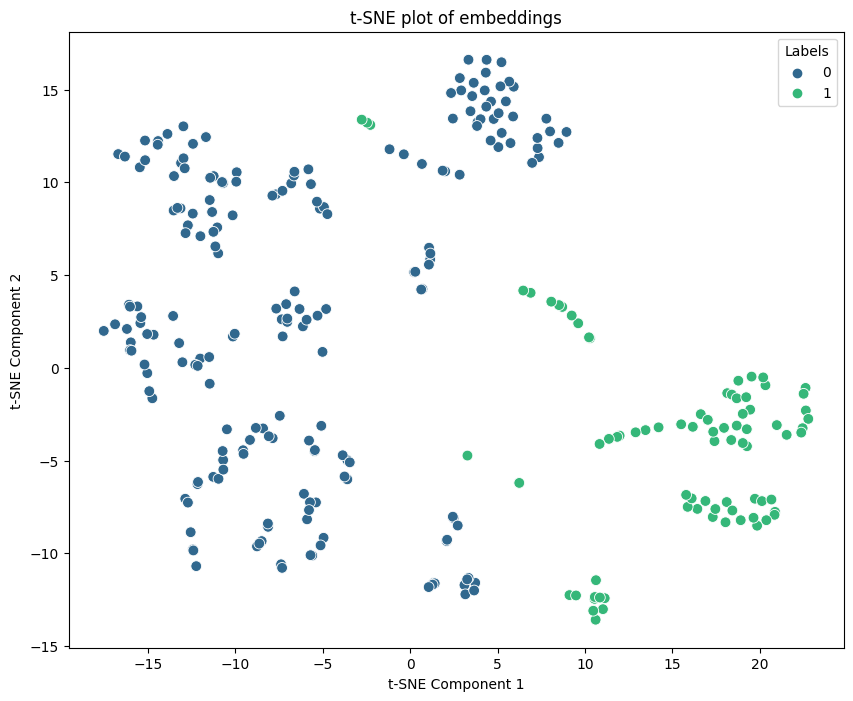

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Convert embeds_arr and labels_arr to numpy arrays
X = np.array(embeds_arr)
Y = np.array(labels_arr)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=Y, palette='viridis', legend='full', s=60)

# Add labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE plot of embeddings')
plt.legend(title='Labels')
plt.show()


In [ ]:
## Train model (experiment #2)

In [63]:
%run train.py

epoch 0


100%|██████████| 131/131 [00:10<00:00, 11.92it/s]


train epoch loss: 1.1552099785731949
train epoch accuracy: 0.42938931297709926


100%|██████████| 45/45 [00:06<00:00,  6.47it/s]


val epoch loss: 1.0660811636182996
val epoch accuracy: 0.4388888888888889
epoch 1


100%|██████████| 131/131 [00:06<00:00, 21.21it/s]


train epoch loss: 0.73834577862543
train epoch accuracy: 0.7251908396946565


100%|██████████| 45/45 [00:02<00:00, 17.44it/s]


val epoch loss: 0.8830853667524126
val epoch accuracy: 0.5916666666666667
epoch 2


100%|██████████| 131/131 [00:07<00:00, 16.42it/s]


train epoch loss: 0.5539999990972854
train epoch accuracy: 0.8330152671755725


100%|██████████| 45/45 [00:02<00:00, 17.50it/s]


val epoch loss: 0.8241071808669302
val epoch accuracy: 0.6694444444444444
epoch 3


100%|██████████| 131/131 [00:07<00:00, 18.22it/s]


train epoch loss: 0.45463821803795473
train epoch accuracy: 0.8740458015267175


100%|██████████| 45/45 [00:02<00:00, 16.95it/s]


val epoch loss: 0.7376840591430665
val epoch accuracy: 0.7111111111111111
epoch 4


100%|██████████| 131/131 [00:06<00:00, 21.19it/s]


train epoch loss: 0.359020012480612
train epoch accuracy: 0.9217557251908397


100%|██████████| 45/45 [00:02<00:00, 17.38it/s]


val epoch loss: 0.687432941628827
val epoch accuracy: 0.7472222222222222
epoch 0


100%|██████████| 131/131 [00:17<00:00,  7.34it/s]


train epoch loss: 0.08640479297156779
train epoch accuracy: 0.9713740458015268


100%|██████████| 45/45 [00:05<00:00,  8.06it/s]


val epoch loss: 0.6625978050274878
val epoch accuracy: 0.775
epoch 1


100%|██████████| 131/131 [00:18<00:00,  7.24it/s]


train epoch loss: 0.003960067884177183
train epoch accuracy: 0.9990458015267175


100%|██████████| 45/45 [00:02<00:00, 17.41it/s]


val epoch loss: 0.6438908021043365
val epoch accuracy: 0.8277777777777777
epoch 2


100%|██████████| 131/131 [00:17<00:00,  7.35it/s]


train epoch loss: 0.00028822331899023467
train epoch accuracy: 1.0


100%|██████████| 45/45 [00:02<00:00, 17.44it/s]


val epoch loss: 0.720405617617588
val epoch accuracy: 0.825
epoch 3


100%|██████████| 131/131 [00:18<00:00,  7.19it/s]


train epoch loss: 0.00016144234377722867
train epoch accuracy: 1.0


100%|██████████| 45/45 [00:05<00:00,  8.36it/s]

val epoch loss: 0.7489238759624843
val epoch accuracy: 0.8222222222222222
epoch 4



100%|██████████| 131/131 [00:17<00:00,  7.37it/s]


train epoch loss: 0.00010278917825625292
train epoch accuracy: 1.0


100%|██████████| 45/45 [00:02<00:00, 17.42it/s]


val epoch loss: 0.7432648797507379
val epoch accuracy: 0.8194444444444444
saving model state dict...
model state dict saved successfully!


In [64]:
!ls checkpoints

dinov2_cosface.pth
dinov2_cosface_exp2.pth


In [65]:
from src.models import DinoVisionTransformerClassifier
from src.utils import load_yaml

cfg = Dict(load_yaml('src/configs/config.yaml'))
model = DinoVisionTransformerClassifier(num_classes=cfg.num_classes, num_features=cfg.feature_dim,
                                        s=cfg.s, m=cfg.m)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = A.Compose([
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=0, p=0.5),
        A.Normalize(mean=0.5, std=0.5, max_pixel_value=255),
        A.Resize(224, 224),
        ToTensorV2()
    ])

df_train = SnowLeopardDataset(cfg.path_to_data_train, transform=transform)
df_val = SnowLeopardDataset(cfg.path_to_data_val, transform=transform)

train_loader = DataLoader(df_train, batch_size=8, shuffle=True, pin_memory=True, num_workers=6)
val_loader = DataLoader(df_val, batch_size=8, shuffle=False, pin_memory=True, num_workers=6)

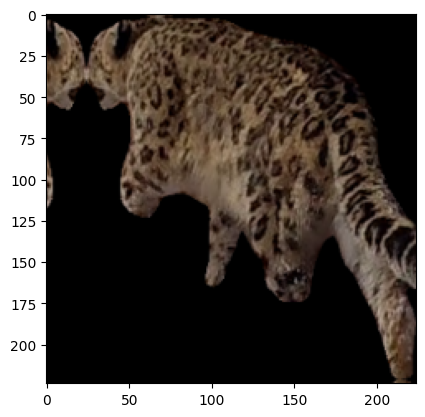

In [76]:
plt.imshow(df_val[0][0].permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5)
plt.show()

In [77]:
model.load_state_dict(torch.load('checkpoints/dinov2_cosface_exp2.pth'))
model.to(device)

DinoVisionTransformerClassifier(
  (transformer): DinoVisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
      (norm): Identity()
    )
    (blocks): ModuleList(
      (0-11): 12 x NestedTensorBlock(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): MemEffAttention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): LayerScale()
        (drop_path1): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (drop): Dropout(p=0.0, in

In [78]:
from tqdm import tqdm

embeds_arr = []
labels_arr = []

model.eval()
with torch.no_grad():
    for images, labels in tqdm(val_loader):
        images = images.to(device)
        labels = labels.detach().cpu().tolist()
        
        embeds = model.transformer(images)

        embeds_arr.extend(embeds.cpu().tolist())
        labels_arr.extend(labels)


100%|██████████| 45/45 [00:05<00:00,  8.29it/s]


In [79]:
np.unique(np.array(labels_arr), return_counts=True)

(array([0, 1, 2]), array([200,  81,  74]))

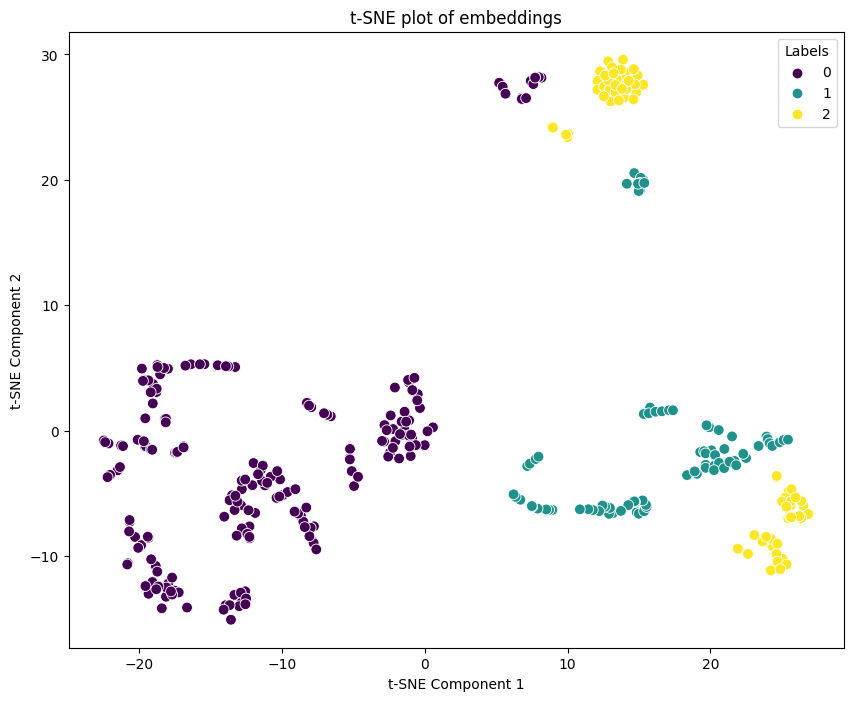

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

# Convert embeds_arr and labels_arr to numpy arrays
X = np.array(embeds_arr)
Y = np.array(labels_arr)

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=Y, palette='viridis', legend='full', s=60)

# Add labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE plot of embeddings')
plt.legend(title='Labels')
plt.show()

In [ ]:
### Train KNN

In [15]:
%run train_knn.py

100%|██████████| 45/45 [00:04<00:00,  9.13it/s]


initialization of knn training
Accuracy KNN: 0.8169014084507042
saving KNN model...


In [14]:
pd.read_csv('csv_files/data_day_exp2_val.csv')['image_path'][300]

'/home/jupyter/datasphere/s3/iofzkzcameratraps/BARSY_OSOBI/barsy_osoby/2__ID-SLM-2BA/day/segmented/IMG_0111_207.png'

In [19]:
%run inference_knn.py

predicted class: [2]


In [20]:
%pwd

'/home/jupyter/work/resources/dino_cosface'